# Importing Libraries

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1- A simple function

# $$ f(x) = x^2 + 2x + 5 $$

In [182]:
#mathematical function

def f(x):
    return x**2 + 2*x + 5

# derivative / gradient
def df(x):
    return 2*x + 2

In [183]:
#generating data

#values
x = np.linspace(start=-10, stop=10, num=100)

#y values
y = f(x)


#slope at each point
slope = df(x)

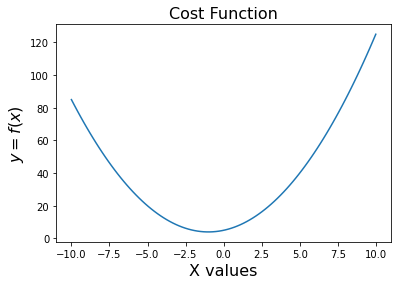

In [184]:
#plotting the function
plt.title("Cost Function", fontsize = 16)
plt.xlabel("X values", fontsize=16)
plt.ylabel("$ y = f(x) $", fontsize=16)
plt.plot(x,y)
plt.show()

## Slope and Derivative

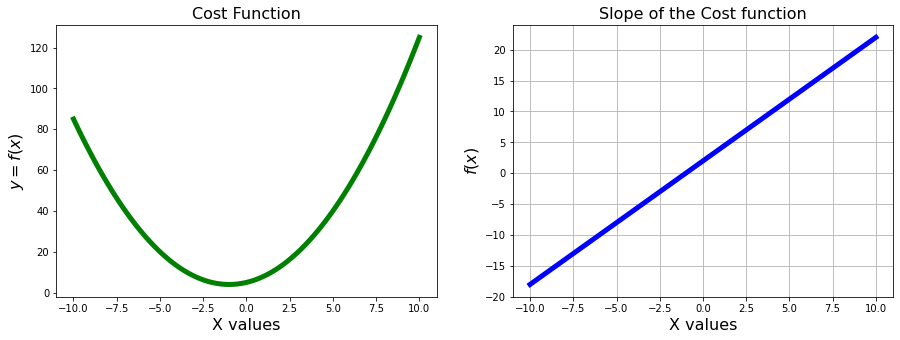

In [185]:
#setting the plot size
plt.figure(figsize = (15,5))

#cost function plot
plt.subplot(1,2,1)
plt.title("Cost Function", fontsize = 16)
plt.xlabel("X values", fontsize=16)
plt.ylabel("$y= f(x) $", fontsize=16) 
plt.plot(x,y, color= "green", linewidth=5)

#slope of the cost function
plt.subplot(1,2,2)
plt.title("Slope of the Cost function", fontsize = 16)
plt.grid()
plt.xlabel("X values", fontsize=16)
plt.ylabel("$ f(x) $", fontsize=16)
plt.plot(x,slope, color ="blue", linewidth=5)

plt.show()

# Gradient Descent

In [186]:
#gradient descent using for loop
new_x = 10
previous_x= 0
lr = 0.01

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - lr*gradient

print("Minima occured at: ", new_x)
print("Slope at this point is: ",df(new_x))
print("Cost Function at this point: ", f(new_x))

Minima occured at:  -0.9995487361634
Slope at this point is:  0.0009025276731999821
Cost Function at this point:  4.0000002036390505


# Saving the steps taken by gradient descent

In [187]:
new_x = 10
previous_x= 0
lr = 0.025

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(1000):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - lr*gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))

# Creating footsteps

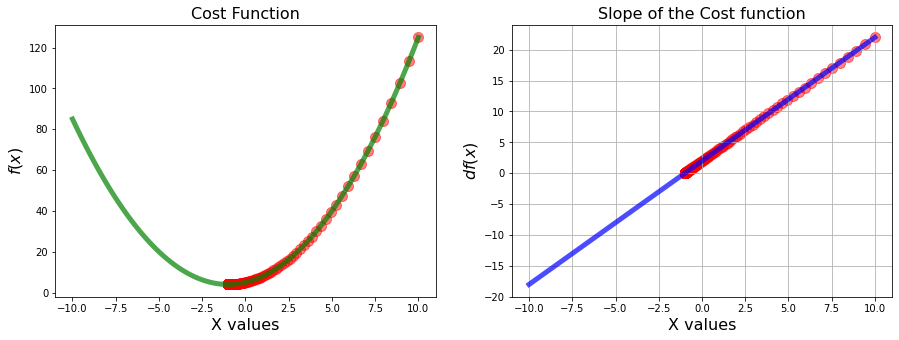

In [188]:
#setting plot size
plt.figure(figsize = (15,5))

#cost function plot
plt.subplot(1,2,1)
plt.title("Cost Function", fontsize = 16)
plt.xlabel("X values", fontsize=16)
plt.ylabel("$ f(x) $", fontsize=16)
val = np.array(x_list)
plt.scatter(x_list, f(val), color="red", s=100, alpha=0.5)
plt.plot(x,y, color= "green", linewidth=5, alpha=0.7)

#slope of the cost function
plt.subplot(1,2,2)
plt.title("Slope of the Cost function", fontsize = 16)
plt.grid()
plt.xlabel("X values", fontsize=16)
plt.ylabel("$ df(x) $", fontsize=16)
plt.plot(x,slope, color ="blue", linewidth=5, alpha=0.7)
plt.scatter(x_list, slope_list, color="red", s=100,alpha=0.5)


plt.show()

# Gradient Descent Function

In [189]:
def gradient_descent(derivative, initial_guess, learning_rate,max_iter=100):
    
    """
    Function performs the gradient descent algorithm
 
    """
    
    new_x = initial_guess
    
    x_list = [new_x]
    slope_list = [derivative(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative(previous_x)
        new_x = previous_x - learning_rate*gradient
        
        x_list.append(new_x)
        slope_list.append(derivative(new_x))
        
        
    return new_x, x_list, slope_list

# Plottting Function

In [190]:
def plot_function(x,y,slope):
    #setting the plot size
    plt.figure(figsize = (15,5))

    #cost function plot
    plt.subplot(1,2,1)
    plt.title("Cost Function", fontsize = 16)
    plt.xlabel("X values", fontsize=16)
    plt.ylabel("$ f(x) $", fontsize=16) 
    plt.plot(x,y, color= "green", linewidth=5)

    #slope of the cost function
    plt.subplot(1,2,2)
    plt.title("Slope of the Cost function", fontsize = 16)
    plt.grid()
    plt.xlabel("X values", fontsize=16)
    plt.ylabel("$ df(x) $", fontsize=16)
    plt.plot(x,slope, color ="blue", linewidth=5)

    plt.show()

In [191]:
def plot_graph_with_descent(x,y,x_list,slope_list,function):

    plt.figure(figsize = (15,5))

    plt.subplot(1,2,1)
    plt.title("Cost Function", fontsize = 16)
    plt.xlabel("X values", fontsize=16)
    plt.ylabel("$ f(x) $", fontsize=16)
    val = np.array(x_list)
    plt.scatter(x_list, function(val), color="red", s=100, alpha=0.5)
    plt.plot(x,y, color= "green", linewidth=5, alpha=0.7)


    plt.subplot(1,2,2)
    plt.title("Slope of the Cost function", fontsize = 16)
    plt.grid()
    plt.xlabel("X values", fontsize=16)
    plt.ylabel("$ df(x) $", fontsize=16)
    plt.plot(x,slope, color ="blue", linewidth=5, alpha=0.7)
    plt.scatter(x_list, slope_list, color="red", s=100,alpha=0.5)


    plt.show()

# Multiple Minima function

## $$ g(x) = x^4 - 4x^2 + x+2 $$

In [192]:
#cost function
def g(x):
    return x**4 - 4*x**2 + x+2

#first derivative
def dg(x):
    return 4*x**3 - 8*x +1

In [193]:
# generating the data 

#X values
x = np.linspace(start=-2, stop=2, num=100)

#Y values
y = g(x)

#slope
slope = dg(x)

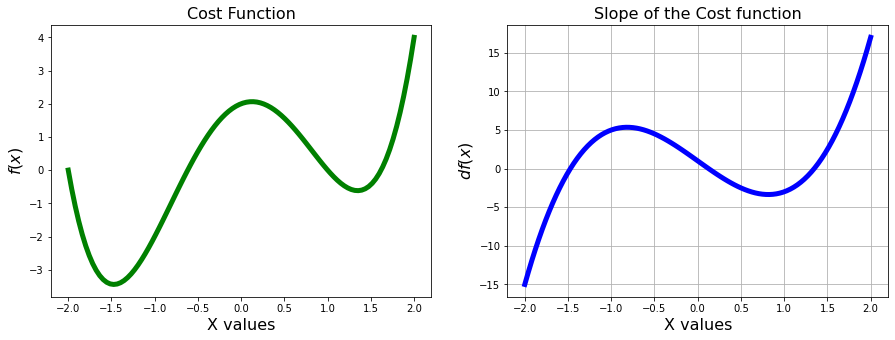

In [194]:
#plot for the function
plot_function(x,y,slope)

local minima for this function is: 1.3469974085277738


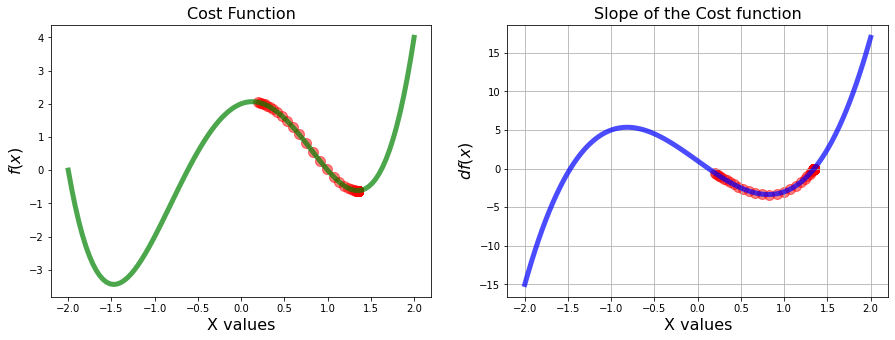

In [195]:
#gradient desecent
minima,x_list,slope_list = gradient_descent(derivative=dg,initial_guess=0.2,learning_rate=0.025)

#minimum value
print("local minima for this function is:",minima)

#plotting graph with steps
plot_graph_with_descent(x,y,x_list,slope_list,g)

local minima for this function is: -1.47299760111403


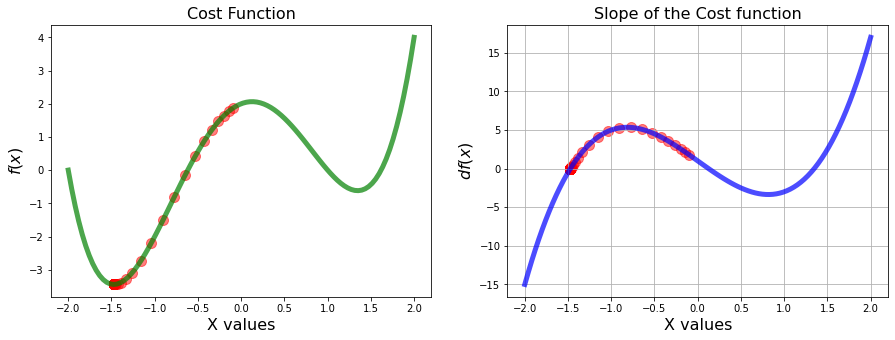

In [196]:
#gradient desecent
minima,x_list,slope_list = gradient_descent(derivative=dg,initial_guess=-0.1,learning_rate=0.025)

#minimum value
print("local minima for this function is:",minima)

#plotting graph with steps
plot_graph_with_descent(x,y,x_list,slope_list,g)

# No change

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [197]:
#cost function 
def g(x):
    return x**4 - 4*x**2 + 5

#derivative 
def dg(x):
    return 4*x**3 - 8*x 

In [198]:
#generating data 

#X values
x = np.linspace(start=-2, stop=2, num=100)

#Y values
y = g(x)

#slope
slope = dg(x)

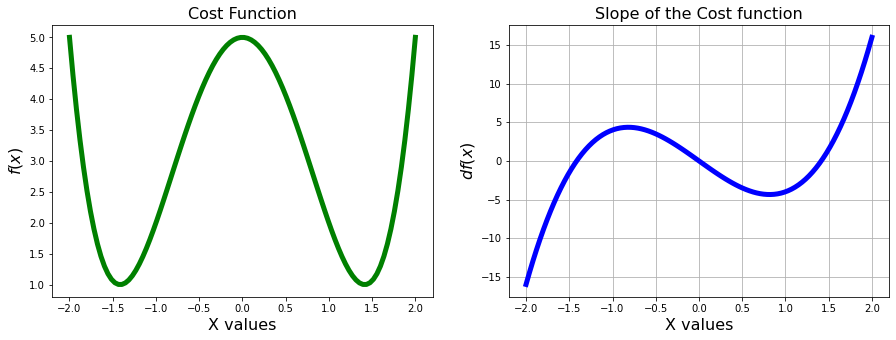

In [199]:
#plot for the function
plot_function(x,y,slope)

local minima for this function is: 0.0


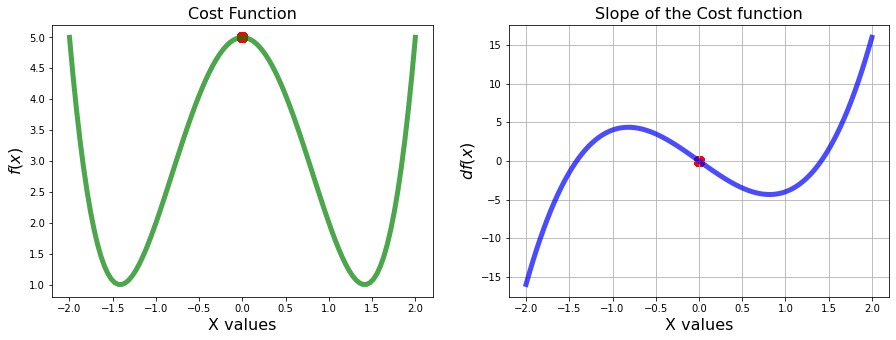

In [200]:
#gradient desecent
minima,x_list,slope_list = gradient_descent(derivative=dg,initial_guess=0.0,learning_rate=0.025)

#minimum value
print("local minima for this function is:",minima)

#plotting graph with steps
plot_graph_with_descent(x,y,x_list,slope_list,g)

# Learning Rate

local minima for this function is: -1.1035301361954708


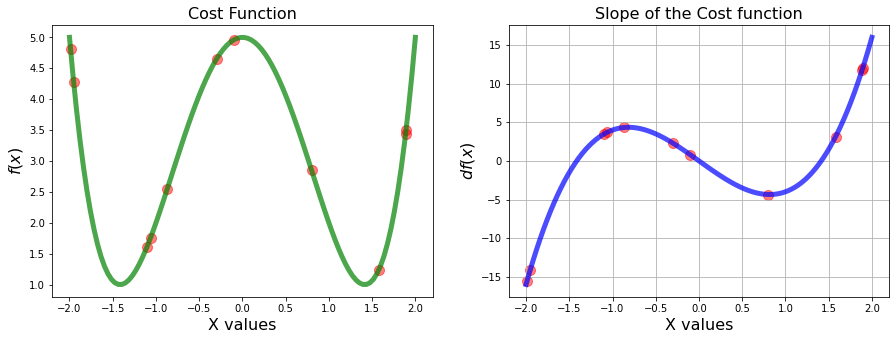

In [201]:
local_min,x_list,slope_list = gradient_descent(derivative=dg,initial_guess=-0.1,learning_rate=0.25,max_iter=10)
print("local minima for this function is:",local_min)
plot_graph_with_descent(x,y,x_list,slope_list,g)

local minima for this function is: -0.2945696582368409


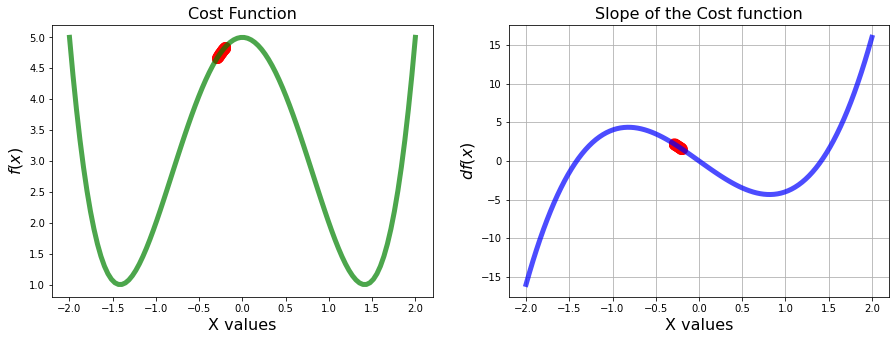

In [202]:
local_min,x_list,slope_list = gradient_descent(derivative=dg,initial_guess=-0.2,learning_rate=0.0005,max_iter=100)
print("local minima for this function is:",local_min)
plot_graph_with_descent(x,y,x_list,slope_list,g)

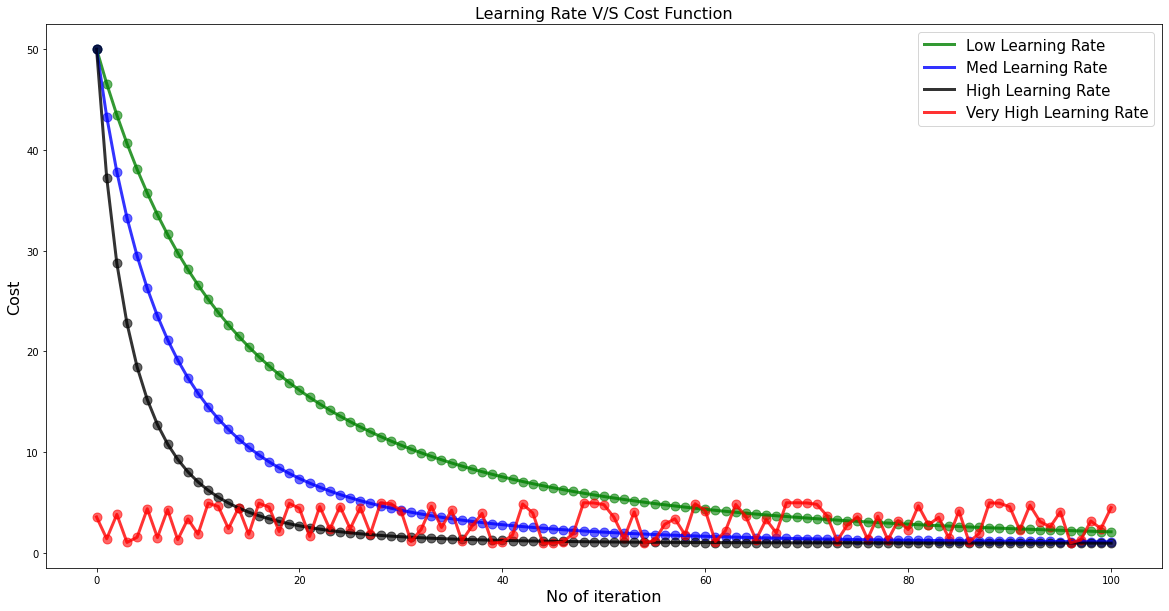

In [203]:
#setting the ietration
n=100

#gradient desecent with low learning rate
low_lr = gradient_descent(derivative=dg,initial_guess=3,learning_rate=0.0005,max_iter=n)

#gradient desecent with medium learning rate
med_lr = gradient_descent(derivative=dg,initial_guess=3,learning_rate=0.001,max_iter=n)

#gradient desecent with high learning rate
high_lr = gradient_descent(derivative=dg,initial_guess=3,learning_rate=0.002,max_iter=n)

#gradient desecent with very high learning rate
very_lr = gradient_descent(derivative=dg,initial_guess=1.9,learning_rate=0.25,max_iter=n)

#plot configuration
plt.figure(figsize=(20,10))   
plt.title("Learning Rate V/S Cost Function", fontsize=16)
plt.xlabel("No of iteration", fontsize = 16)
plt.ylabel("Cost", fontsize = 16)


#x values
iteration_list = list(range(0,n+1))

#converting into numpy array
low_values = np.array(low_lr[1])

med_values = np.array(med_lr[1])

high_values = np.array(high_lr[1])

very_values = np.array(very_lr[1])

#plot for low learning rate
plt.plot(iteration_list,g(low_values), color = "green", linewidth=3,alpha=0.8,label = "Low Learning Rate")
plt.scatter(iteration_list,g(low_values), color = "green", s = 80, alpha=0.6)

#plot for medium learning rate
plt.plot(iteration_list,g(med_values), color = "blue", linewidth=3,alpha=0.8, label = "Med Learning Rate")
plt.scatter(iteration_list,g(med_values), color = "blue", s = 80, alpha=0.6)

#plot for high learning rate
plt.plot(iteration_list,g(high_values), color = "black", linewidth=3,alpha=0.8,label = "High Learning Rate")
plt.scatter(iteration_list,g(high_values), color = "black", s = 80, alpha=0.6)

#plot for very high learning rate
plt.plot(iteration_list,g(very_values), color = "red", linewidth=3,alpha=0.8,label = "Very High Learning Rate")
plt.scatter(iteration_list,g(very_values), color = "red", s = 80, alpha=0.6)

plt.legend(fontsize=15)

# Cost function in 3D

# Minimise $$ f(x,y) = x^2 + y^2$$


In [204]:
#cost function
def g(x,y):
    
    return x**2 + y**2

#dervative w.r.t x
def dx(x,y):
    
    return 2*x

#dervative w.r.t y
def dy(x,y):
    
    return 2*y

In [205]:
#generating the data

#x values
x = np.linspace(start = -2, stop = 2, num=200)

#y values
y = np.linspace(start = -2, stop = 2, num=200)

#creating 2D data
x,y = np.meshgrid(x,y)

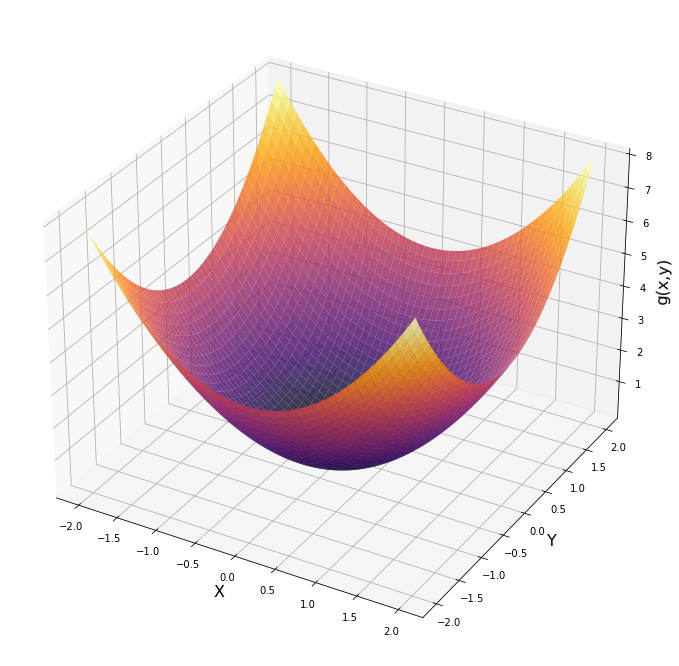

In [206]:
#plotting the function
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.set_zlabel("g(x,y)", fontsize=16)
ax.plot_surface(x,y,g(x,y),cmap=cm.inferno, alpha = 0.8)
plt.show()

In [207]:
#gradient descent 

multiplier = 0.02
max_iter = 100
initial_guess = np.array([2,2])

values_list =  initial_guess.reshape(1,2)

for n in range(max_iter):
    
    gradient_x = dx(initial_guess[0],initial_guess[1])     #gradient in x direction
    gradient_y = dy(initial_guess[0],initial_guess[1])     #gradient in y direction
    gradients = np.array([gradient_x,gradient_y])          #combining the gradients
    initial_guess = initial_guess - multiplier*gradients   #applying the equation
    values_list= np.append(values_list, initial_guess.reshape(1,2), axis = 0) #appending 


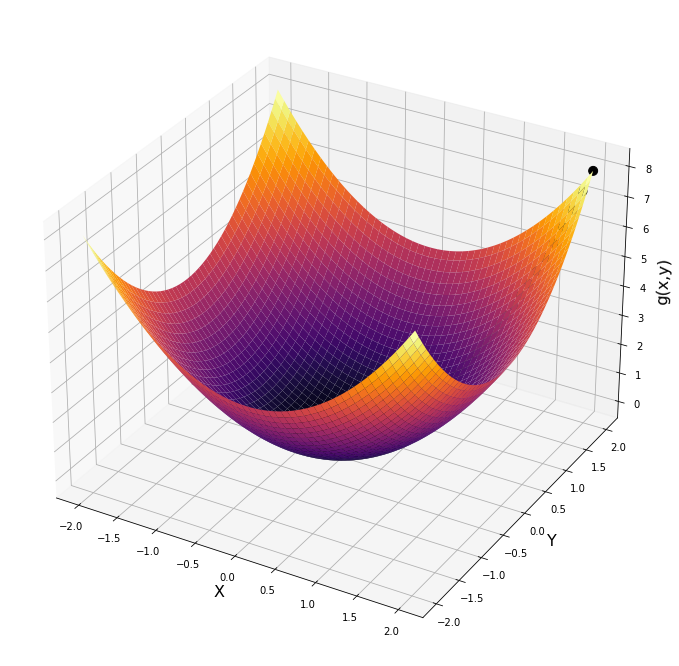

In [208]:
#plotting the function with step
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.set_zlabel("g(x,y)", fontsize=16)
ax.plot_surface(x,y,g(x,y),cmap=cm.inferno)
ax.scatter(values_list[:,0],values_list[:,1], g(values_list[:,0],values_list[:,1]),s =80, color = "black")

plt.show()

# Linear Regression and implementation

In [209]:
#generating data

#x values
x = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)

#y values
y = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

In [210]:
#fitting sk learn linear regression model
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [211]:
#printing the values of parameters

print("Intercept:", model.intercept_[0])
print("Beta:", model.coef_[0][0])

Intercept: 0.8475351486029554
Beta: 1.222726463783591


Text(0, 0.5, 'y values')

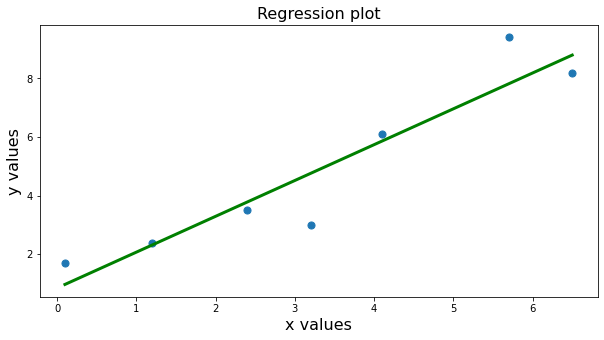

In [212]:
#Plotting actual values v/s predicted values
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=50)
plt.plot(x,model.predict(x), color = "green", linewidth = 3)
plt.title("Regression plot", fontsize=16)
plt.xlabel("x values",fontsize=16)
plt.ylabel("y values", fontsize=16)

In [213]:
#cost function
def mse(y,prediction):
    
    mse_cal = np.average((y-prediction)**2,axis=0)
    
    return mse_cal

In [214]:
#generating data
n=5

#sample space for intercept or alpha 
alpha = np.linspace(-3,3,n)

#sample space for slope
beta = np.linspace(-3,3,n)

In [215]:
#sample space for cost function

#placeholder
cost = np.zeros((n,n))

#creating 2D
alpha,beta = np.meshgrid(alpha,beta)

#filling possible values for loss/cost function
for i in range(n):
    for j in range(n):
        pred = alpha[i][j]+beta[i][i]*x
        cost[i][j] = mse(y,pred)
        

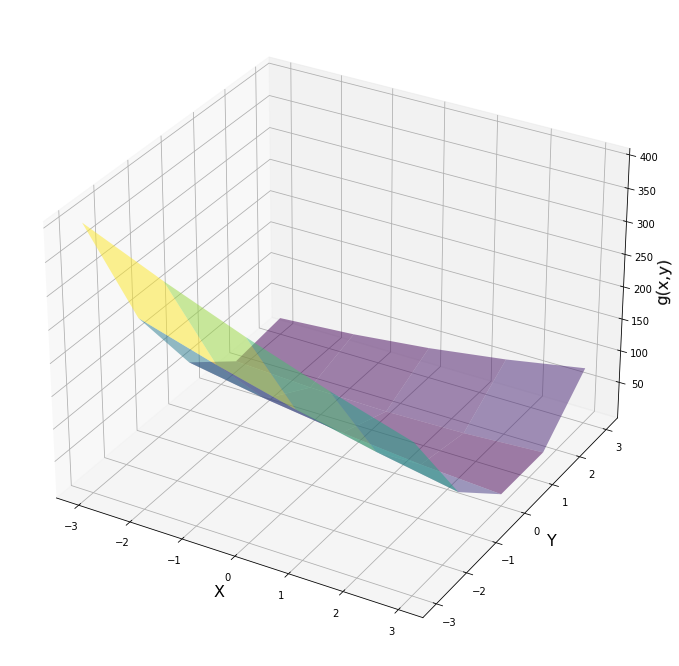

In [216]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.set_zlabel("g(x,y)", fontsize=16)
ax.plot_surface(alpha,beta,cost,cmap=cm.viridis, alpha = 0.5,)

plt.show()

In [217]:
#gradient calculator 
def grad(x,y,params):
    
    n=y.size
    
    intercept_grad = (-2/n)*sum(y-params[0]-params[1]*x)
    beta_grad = (-2/n)*sum((y-params[0]-params[1]*x)*x)
    
    return np.concatenate((intercept_grad,beta_grad), axis=0)

In [218]:
#gradient descent

multiplier = 0.01
max_iter = 2000
initial_guess = np.array([2,2])
plot_value = initial_guess.reshape(1,2)
mse_value = mse(y,initial_guess[0]+initial_guess[1]*x)

for n in range(max_iter):
    initial_guess = initial_guess - multiplier*grad(x,y,initial_guess)           # applying the equation
    plot_value = np.concatenate((plot_value,initial_guess.reshape(1,2)), axis=0) # keeping all the steps taken 
    mse_value = np.append(mse_value,mse(y,initial_guess[0]+initial_guess[1]*x))  # keeping all the mse value taken


In [219]:
#comparison between sklearn and linear regression from scratch

print("Intercept from SKlearn Linear Regression:", model.intercept_[0])
print("Intercept from gradient descent:",initial_guess[0])
print("\n")
print("Beta from SKlearn Linear Regression:", model.coef_[0][0])
print("Beta from gradient descent:", initial_guess[1])

Intercept from SKlearn Linear Regression: 0.8475351486029554
Intercept from gradient descent: 0.8475468335533332


Beta from SKlearn Linear Regression: 1.222726463783591
Beta from gradient descent: 1.2227239309088693


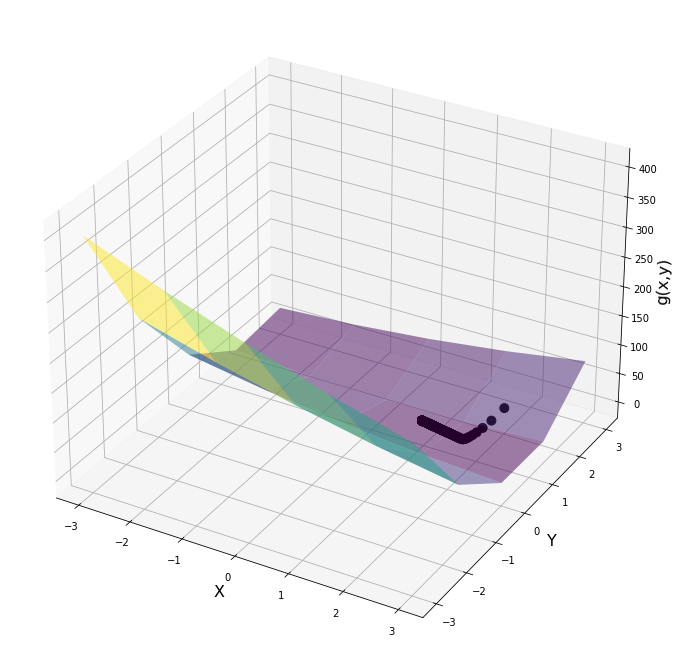

In [220]:
#plotting the cost function and the step taken
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Y", fontsize=16)
ax.set_zlabel("g(x,y)", fontsize=16)
ax.plot_surface(alpha,beta,cost,cmap=cm.viridis, alpha = 0.5)
ax.scatter(plot_value[:,0],plot_value[:,1],mse_value,s=80,color="black",alpha=1)

plt.show()